In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown

def plotIt(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotScat(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotIt2(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1, x2,y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

def plotIt2s(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1,'rx')
    ax.plot(x2, y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

Identification 
==============

Pour caractériser un capteur, on fait un certain nombre de mesures puis on cherche une caractéristique.


In [2]:
def aSensor(G):
    G0=0.5
    return np.exp(G/G0)

Gs=np.linspace(0, 1, 20)
Ss=aSensor(Gs)/4
RSs=Ss+(np.random.rand(20)-0.5)*0.1

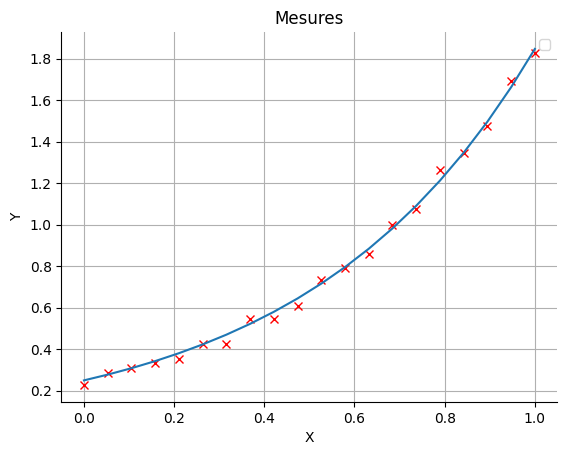

In [3]:
plotIt2s(Gs,RSs,Gs,Ss, title="Mesures")

Exemple avec capteur de température
----------------------------------

Soit un capteur dont les valeurs sont données comme suit
Source : https://www.guilcor.fr/content/31-table-de-conversion-des-sondes-pt100

In [4]:
tabT = np.array([[0,100], [20, 107.79],[40,115.54],[60,123.24],[80,130.89],[100,138.5],[120,146.06],[140,153.58],[160,161.04],\
        [180,168.46],[200,175.85]])

temps=tabT[:,0]
Rs=tabT[:,1]

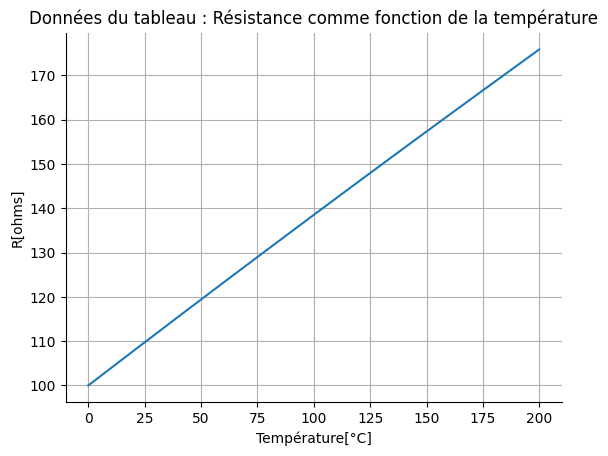

In [5]:
plotIt(temps,Rs,xlab="Température[°C]", ylab="R[ohms]", title="Données du tableau : Résistance comme fonction de la température")

Inversion des axes pour l'utilisation du capteur

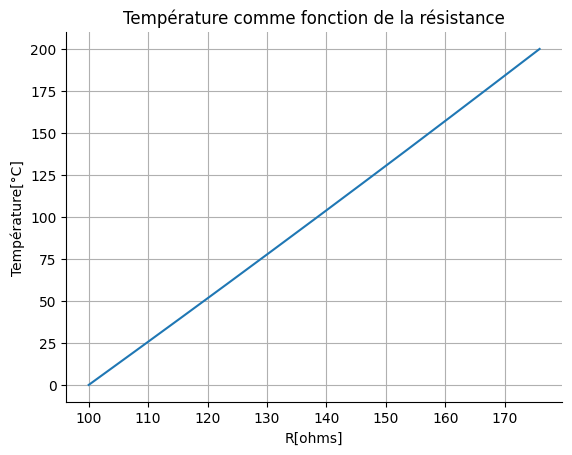

In [6]:
plotIt(Rs,temps, xlab="R[ohms]",ylab="Température[°C]", title="Température comme fonction de la résistance")

In [7]:
g=(Rs[-1]-Rs[0])/(temps[-1]-temps[0])
g
def getT(R):
    return (R-Rs[0])/g+temps[0]
    

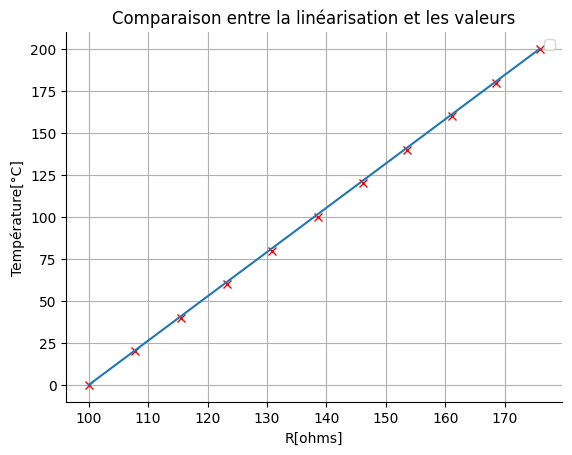

In [8]:
Rlin=np.array([Rs[0],Rs[-1]])
Tlin=np.array([temps[0],temps[-1]])
    
plotIt2s(Rs,temps,Rlin,Tlin,ylab="Température[°C]", xlab="R[ohms]", title="Comparaison entre la linéarisation et les valeurs") 

Si on trace la différence entre les 2 signaux, on peut voir l'erreur. Il faut d'abord extrapoler une valeur de T pour chaque valeur de R du tableau :

In [9]:
Tlin=np.zeros(len(Rs))
for i in range(len(Rs)):
    Tlin[i]=getT(Rs[i])

In [10]:
(Tlin, temps)

(array([  0.        ,  20.54054054,  40.97560976,  61.27883982,
         81.45023072, 101.5161503 , 121.45023072, 141.27883982,
        160.94924192, 180.51417271, 200.        ]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]))

Petite vérification...

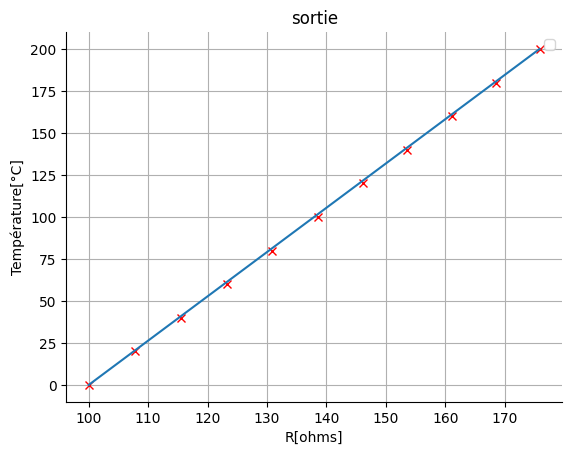

In [11]:
plotIt2s(Rs, temps, Rs, Tlin,ylab="Température[°C]", xlab="R[ohms]")

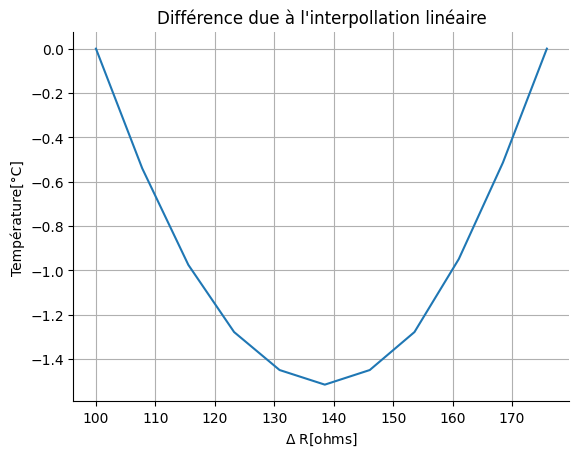

In [12]:
plotIt(Rs, temps-Tlin,ylab="Température[°C]", xlab="$\Delta$ R[ohms]", title="Différence due à l'interpollation linéaire")

In [13]:
Rmes=138.5
getT(Rmes)

101.5161502966381

Il y a une erreur car la linéarisation fait une approximation de la courbe réelle. On va cherche un polynôme de degré 2 qui fait correspondre au mieux la valeur de température (temps) comme fonction de la résistance (Rs).

On aura une relation de la forme

$$ T = T_0 + T_1*R + T_2*R^2$$

In [14]:
poly=np.polyfit(Rs, temps,2)

In [15]:
poly

array([ 1.05773469e-03,  2.34488299e+00, -2.45053054e+02])

In [16]:
def getTpoly(R):
    return poly[2]+poly[1]*R+poly[0]*R**2

On peut maintenant calculer la température à partir d'une valeur de résistance

In [17]:
getTpoly(Rmes)

100.00297051043236

On calcule les valeurs de température pour toutes les valeurs de R à partir du polynome

In [18]:
vTpoly=np.zeros(len(Rs))
for i in range(len(Rs)):
    vTpoly[i]=getTpoly(Rs[i])

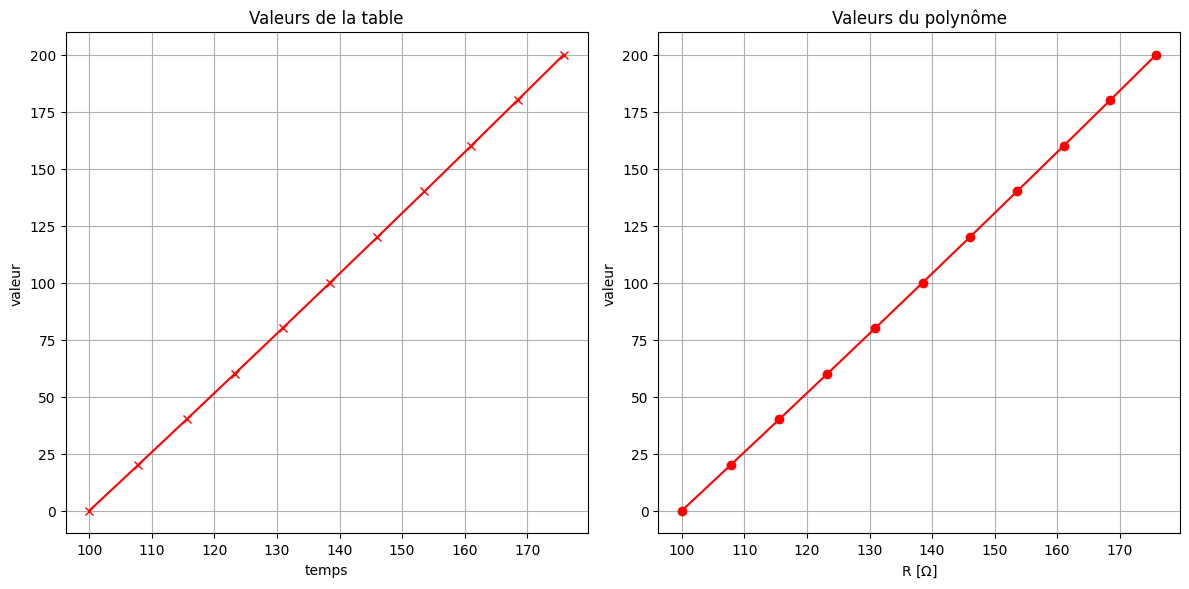

In [19]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_xlabel("temps")
ax.set_ylabel("valeur")
ax.set_title("Valeurs de la table")
ax.grid(True, which='both')
plt.plot(Rs, temps, 'rx-')

ax = f.add_subplot(gs[0,1])
ax.set_xlabel("R [$\Omega$]")
ax.set_ylabel("valeur")
ax.set_title("Valeurs du polynôme")
ax.grid(True, which='both')
plt.plot(Rs, vTpoly, 'ro-')

f.tight_layout()

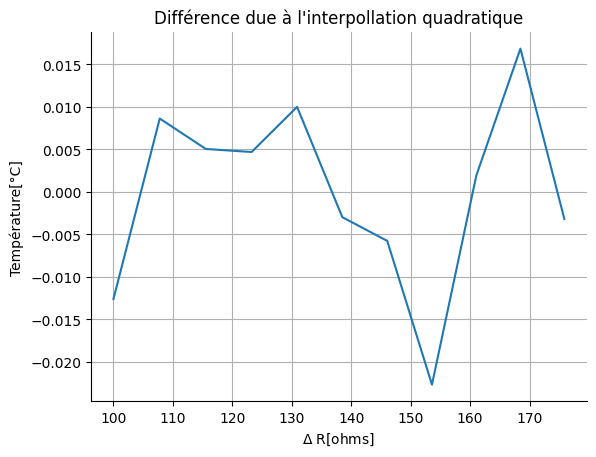

In [20]:
plotIt( Rs, temps-vTpoly,ylab="Température[°C]", xlab="$\Delta$ R[ohms]", title="Différence due à l'interpollation quadratique")